In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
os.chdir("D:/Great Lakes PGPDSE/Great Lakes/13 Ensemble Techniques/Mini Project")

#### Reading the dataset

In [4]:
hr = pd.read_csv("HR_Employee_Attrition_Dat.csv")

Converting Yes / No values in Attrition column to 1 / 0 

In [5]:
cleanup_nums = {"Attrition":     {"Yes": 1, "No": 0}}

In [6]:
hr.replace(cleanup_nums, inplace=True)

In [25]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


#### Splitting to training and testing data

In [26]:
from sklearn.cross_validation import train_test_split
import random

In [27]:
np.random.seed(40)
train,test = train_test_split( hr, test_size = 0.3)

#### Spliting target variable and independent variables

In [28]:
X1 =  train[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X2 =  test[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [29]:
y_train = train["Attrition"]
y_test = test["Attrition"]

#### Categorical Variable to Numerical Variables

In [30]:
X_train = pd.get_dummies(X1)
X_test = pd.get_dummies(X2)
X_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

#### Fitting AdaBoost model

In [31]:
model = AdaBoostClassifier(n_estimators=30)
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=30, random_state=None)

In [32]:
pred_y_train = model.predict(X_train)
pred_y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

#### Classification accuracy of the model in train data

In [33]:
score = accuracy_score(y_train, pred_y_train)
score

0.8974732750242954

#### AUC of the model in train data

In [34]:
y_train_prob = model.predict_proba(X_train)
fpr, tpr, thresholds =  roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)

0.9006297150478626

#### Classification accuracy of the model in test data

In [35]:
pred_y_test = model.predict(X_test)
pred_y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [36]:
score_test = accuracy_score(y_test, pred_y_test)
score_test

0.8968253968253969

#### AUC of the model in train data

In [37]:
y_test_prob = model.predict_proba(X_test)
fpr, tpr, thresholds =  roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.8435021178282633

Here the AUC for test data differs alot compared to that of train data. That is the model is overfitting. So we need to do some parameter tuning

#### Cross validatin

In [38]:
scores = model_selection.cross_val_score(model, X_train, y_train, cv = 10, scoring='roc_auc')
scores.mean()

0.8504723144558511

In [21]:
scores.std()

0.04768426938729329

So by cross validation we get the correct AUC of the model, that is 85.04% is the correct AUC with standard deviation of 0.047. For test data it is almost same, but auc for training data is high. so the model is overfitted. Need to tune the model.

#### Checking important variables

In [39]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

MonthlyIncome                        0.100000
DailyRate                            0.066667
JobInvolvement                       0.066667
JobSatisfaction                      0.066667
NumCompaniesWorked                   0.066667
YearsWithCurrManager                 0.066667
OverTime_Yes                         0.033333
WorkLifeBalance                      0.033333
BusinessTravel_Travel_Frequently     0.033333
BusinessTravel_Non-Travel            0.033333
YearsSinceLastPromotion              0.033333
YearsAtCompany                       0.033333
StockOptionLevel                     0.033333
TrainingTimesLastYear                0.033333
TotalWorkingYears                    0.033333
Department_Research & Development    0.033333
RelationshipSatisfaction             0.033333
EnvironmentSatisfaction              0.033333
DistanceFromHome                     0.033333
OverTime_No                          0.033333
Age                                  0.033333
EducationField_Technical Degree   

No handles with labels found to put in legend.


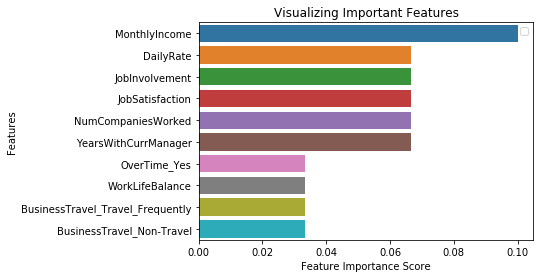

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
feature_imp=feature_imp[0:10,]

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Here most important variable is monthly income followed by daily rate, jobInvolvement etc

#### Parameter Tuning

In [43]:
param_dist = {"n_estimators":np.arange(10,20),  
               "learning_rate": [0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,1],
             }

In [44]:
tree = AdaBoostClassifier(random_state=None)
tree_cv  = GridSearchCV(tree, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), 'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

#### Building the model using best combination of parameters

In [45]:
print("Tuned Decision Tree parameter : {}".format(tree_cv.best_params_))
classifier = tree_cv.best_estimator_
classifier.fit(X_train,y_train)

Tuned Decision Tree parameter : {'learning_rate': 0.9, 'n_estimators': 15}


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=15, random_state=None)

#### Checking AUC of the tuned model

For train data

In [46]:
y_train_prob = classifier.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc_d = auc(fpr, tpr)
auc_d

0.8702762688080915

For test data

In [47]:
y_test_prob = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc_h = auc(fpr, tpr)
auc_h

0.8084809395456295

#### Scoring and Rank ordering

In [48]:
Prediction = classifier.predict_proba(X_train)
train["prob_score"] = Prediction[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


decile code

In [49]:
def deciles(x):
    decile = pd.Series(index=[0,1,2,3,4,5,6,7,8,9])
    for i in np.arange(0.1,1.1,0.1):
        decile[int(i*10)]=x.quantile(i)
    def z(x):
        if x<decile[1]: return(1)
        elif x<decile[2]: return(2)
        elif x<decile[3]: return(3)
        elif x<decile[4]: return(4)
        elif x<decile[5]: return(5)
        elif x<decile[6]: return(6)
        elif x<decile[7]: return(7)
        elif x<decile[8]: return(8)
        elif x<decile[9]: return(9)
        elif x<=decile[10]: return(10)
        else:return(np.NaN)
    s=x.map(z)
    return(s)

In [51]:
def Rank_Ordering(X,y,Target):
    X['decile']=deciles(X[y])
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_resp","max_resp","avg_resp",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank = Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"] = Rank["cnt_resp"]*100/Rank["cnt"]
    Rank["cum_resp"] = np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"] = np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"] = Rank["cum_resp"]/np.sum(Rank["cnt_resp"])
    Rank["cum_non_resp_pct"]=Rank["cum_non_resp"]/np.sum(Rank["cnt_non_resp"])
    Rank["KS"] = Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"]
    Rank
    return(Rank)

#### Rank ordering of train data

In [52]:
Rank = Rank_Ordering(train,"prob_score","Attrition")
Rank


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,10,0.492985,0.552292,0.508124,207.0,149.0,58.0,71.980676,149.0,58.0,0.446108,0.033643,0.412465
8,9,0.478632,0.492753,0.485165,205.0,73.0,132.0,35.609756,222.0,190.0,0.664671,0.110209,0.554462
7,8,0.470529,0.478534,0.474212,206.0,50.0,156.0,24.271845,272.0,346.0,0.814371,0.200696,0.613675
6,7,0.462778,0.470368,0.466580,209.0,16.0,193.0,7.655502,288.0,539.0,0.862275,0.312645,0.549630
5,6,0.456808,0.462664,0.460072,203.0,12.0,191.0,5.911330,300.0,730.0,0.898204,0.423434,0.474770
4,5,0.450552,0.456662,0.453513,213.0,11.0,202.0,5.164319,311.0,932.0,0.931138,0.540603,0.390534
3,4,0.443132,0.450531,0.447345,200.0,11.0,189.0,5.500000,322.0,1121.0,0.964072,0.650232,0.313840
2,3,0.435527,0.443102,0.440030,200.0,5.0,195.0,2.500000,327.0,1316.0,0.979042,0.763341,0.215701
1,2,0.424101,0.435035,0.430296,212.0,5.0,207.0,2.358491,332.0,1523.0,0.994012,0.883411,0.110601
0,1,0.389532,0.423488,0.413146,203.0,2.0,201.0,0.985222,334.0,1724.0,1.000000,1.000000,0.000000


Here Best KS=0.6136 and response rate in 10th decile = 72.68%

#### Rank ordering for test data

In [53]:
Prediction_h = classifier.predict_proba(X_test)
test["prob_score"] = Prediction_h[:,1]

Rank_h = Rank_Ordering(test,"prob_score","Attrition")
Rank_h

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,10,0.491897,0.552292,0.508638,89.0,57.0,32.0,64.044944,57.0,32.0,0.407143,0.043127,0.364016
8,9,0.479137,0.491757,0.484948,88.0,24.0,64.0,27.272727,81.0,96.0,0.578571,0.129380,0.449191
7,8,0.471644,0.479030,0.474969,88.0,21.0,67.0,23.863636,102.0,163.0,0.728571,0.219677,0.508895
6,7,0.463812,0.471616,0.467919,90.0,8.0,82.0,8.888889,110.0,245.0,0.785714,0.330189,0.455526
5,6,0.458810,0.463751,0.461099,86.0,6.0,80.0,6.976744,116.0,325.0,0.828571,0.438005,0.390566
4,5,0.451048,0.458749,0.454577,88.0,5.0,83.0,5.681818,121.0,408.0,0.864286,0.549865,0.314420
3,4,0.443638,0.451027,0.447738,88.0,7.0,81.0,7.954545,128.0,489.0,0.914286,0.659030,0.255256
2,3,0.437537,0.443423,0.440701,90.0,6.0,84.0,6.666667,134.0,573.0,0.957143,0.772237,0.184906
1,2,0.428106,0.437471,0.431890,87.0,4.0,83.0,4.597701,138.0,656.0,0.985714,0.884097,0.101617
0,1,0.389532,0.427822,0.416982,88.0,2.0,86.0,2.272727,140.0,742.0,1.000000,1.000000,0.000000


###### Here on testing the model on test data we are getting KS value of 0.5088 and response rate of 64.04% in the top decile. This looks very good but compared to the training data this is less. The model looks bit over fitted.

Here the employees who all comes in the 10th decile are most likely to leave the company. 
Let’s assume that training of new employee costs 1000 dollar and since we know which employee is likely to leave next month, and propose him/her a bonus program worth 500 to keep him for next 6 months, we are 500 dollar to keep him for next 6 months,we are 500 dollar on plus and keep experienced, well-trained employee under the hood, with higher morale.
So better to take care of these employees and company should be prepared to find substitution for those.